In [1]:
# General Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime Library
from datetime import date

# Helper Functions
import acquire

### Background

#### Index
Thousands of indexes track the movements of various sectors, markets, and investment strategies on a daily basis, and are used to determine that market's health and performance.

Using an index, it is possible to see how much value an active manager adds and from where, or through what investments, taht value comes. 

#### Index Fund
An <b>index fund</b> is a type of mutural fund or exchange-traded fund (ETF). It's made up of stocks or bonds attemting to earn the same return as a particular index.

Index funds are passively managed, which means that they typically hold waht's in the index (which rarely changes) to maximize returns and minimize costs. 

#### What is an ETF?
An ETF is a fund can be traded on an exchange like a stock, which means they can be bought and sold throughtout the trading day (unlike mutual funds, which are priced at the end of the trading day).

An ETF is a type of security that tracks an index, sector, commodity or other asset, but which can be purchased or sold on stock exchange the same as a regular stock.

ETF share prices fluctuate all day as the ETF is bought and sold and it is different from mutual funds that only trade once a day after the market closes.
#### How an ETF is structured? 
An ETF can be structured to track anything from the price of an individual commodity to a large and diverse collection of securities. 

ETFs can contain all types of investments including stocks, commodities, or bonds; some offter U.S. only holdings, while other are international. 

???Will the structure of ETF change over time???

#### Reference
- [Investing in Index Funds for Beginners](https://www.thebalance.com/investing-in-index-funds-for-beginners-356318)

### Actively Managed ETFs from ARK

In [5]:
%%time
# Create a list of interested stocks
arks = ['ARKK', 'ARKQ', 'ARKW', 'ARKG', 'ARKF']

# Creata a list of benchmark indexes
references = ['^GSPC', '^DJI', '^IXIC', 'VOOG','TSLA']

# Define start and end date
start_date = '2014-09-30'
end_date = date.today()

# Acquire their adjusted closing prices from yahoo finance
df_arks = acquire.acquire_stock_data(arks+references, 'yahoo', start_date, end_date)

# Inspect the dataframe
print(df_arks.shape)
df_arks.tail()

(1628, 10)
CPU times: user 576 ms, sys: 49.5 ms, total: 626 ms
Wall time: 5.92 s


,ARKK,ARKQ,ARKW,ARKG,ARKF,^GSPC,^DJI,^IXIC,VOOG,TSLA
Date,,,,,,,,,,
2021-03-12,126.680000,86.050003,157.479996,91.800003,54.270000,3943.340088,32778.640625,13319.860352,231.399994,693.729980
2021-03-15,128.880005,87.620003,160.740005,93.860001,55.189999,3968.939941,32953.460938,13459.709961,233.360001,707.940002
2021-03-16,126.019997,85.750000,157.929993,92.300003,54.950001,3962.709961,32825.949219,13471.570312,234.179993,676.880005
2021-03-17,127.459999,87.360001,159.809998,92.989998,55.419998,3974.120117,33015.371094,13525.200195,234.580002,701.809998
2021-03-18,120.320000,84.400002,151.070007,88.879997,52.439999,3920.429932,32879.441406,13151.506836,229.537598,658.179993


In [6]:
# Make a copy of the dataframe
df = df_arks.copy()

# Print the concise summary of the copied dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1628 entries, 2014-09-30 to 2021-03-18
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ARKK    1605 non-null   float64
 1   ARKQ    1628 non-null   float64
 2   ARKW    1628 non-null   float64
 3   ARKG    1605 non-null   float64
 4   ARKF    535 non-null    float64
 5   ^GSPC   1628 non-null   float64
 6   ^DJI    1628 non-null   float64
 7   ^IXIC   1628 non-null   float64
 8   VOOG    1628 non-null   float64
 9   TSLA    1628 non-null   float64
dtypes: float64(10)
memory usage: 139.9 KB


**Takeaways**: Those five ETFs have different inception dates.

In [7]:
# Add a new column to compute the average of the 5 active ETFs
df = df.assign(arks_avg = df[arks].mean(axis=1))

# Sanity check
df.tail()

,ARKK,ARKQ,ARKW,ARKG,ARKF,^GSPC,^DJI,^IXIC,VOOG,TSLA,arks_avg
Date,,,,,,,,,,,
2021-03-12,126.680000,86.050003,157.479996,91.800003,54.270000,3943.340088,32778.640625,13319.860352,231.399994,693.729980,103.256001
2021-03-15,128.880005,87.620003,160.740005,93.860001,55.189999,3968.939941,32953.460938,13459.709961,233.360001,707.940002,105.258002
2021-03-16,126.019997,85.750000,157.929993,92.300003,54.950001,3962.709961,32825.949219,13471.570312,234.179993,676.880005,103.389999
2021-03-17,127.459999,87.360001,159.809998,92.989998,55.419998,3974.120117,33015.371094,13525.200195,234.580002,701.809998,104.607999
2021-03-18,120.320000,84.400002,151.070007,88.879997,52.439999,3920.429932,32879.441406,13151.506836,229.537598,658.179993,99.422001


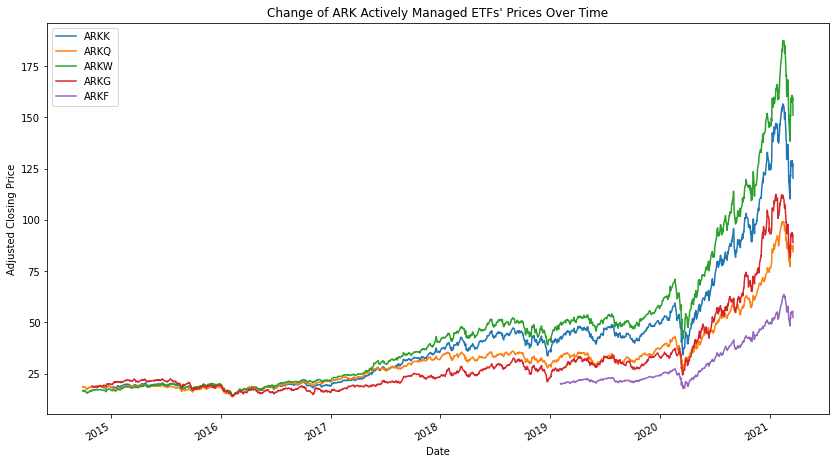

In [8]:
# Plot the prices of the 5 ETFs over time

df[arks].plot(figsize=(14,8))
plt.ylabel("Adjusted Closing Price")
plt.title("Change of ARK Actively Managed ETFs' Prices Over Time")
plt.show()

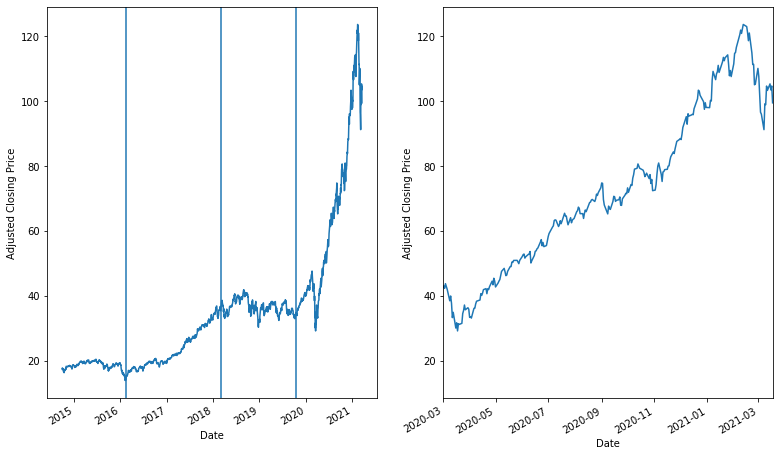

In [9]:
# Plot the mean over time and zoom in since the beginning of last March

# Set up the figure size
plt.figure(figsize=(13,8))

plt.subplot(121)
df.arks_avg.plot()
plt.ylabel("Adjusted Closing Price")
plt.axvline(x="2016-02-15")
plt.axvline(x="2018-03-01")
plt.axvline(x="2019-10-15")
# Extra plt.show() here will show the two plots in two rows. 

plt.subplot(122)
df.arks_avg.plot()
plt.ylabel("Adjusted Closing Price")
plt.xlim('2020-03-01', end_date)
plt.show()

**Takeaways**
1. The curve of the mean shows a flat-up-flat-up pattern. 
2. Since March 2020, the price of the ARK's ETFs increased about 2.5 folds on average. 

In [10]:
# Scale the adjusted closing prices and indexes using today's value as the reference
df_scaled = df.apply(lambda i: i/i.tail(1).values, axis=0)

# Inspect the scaled dataframe
df_scaled.tail()

,ARKK,ARKQ,ARKW,ARKG,ARKF,^GSPC,^DJI,^IXIC,VOOG,TSLA,arks_avg
Date,,,,,,,,,,,
2021-03-12,1.052859,1.019550,1.042431,1.032853,1.034897,1.005844,0.996934,1.012801,1.008114,1.054013,1.038563
2021-03-15,1.071144,1.038152,1.064010,1.056031,1.052441,1.012374,1.002251,1.023435,1.016653,1.075602,1.058699
2021-03-16,1.047374,1.015995,1.045409,1.038479,1.047864,1.010785,0.998373,1.024337,1.020225,1.028412,1.039911
2021-03-17,1.059342,1.035071,1.057854,1.046242,1.056827,1.013695,1.004134,1.028414,1.021968,1.066289,1.052161
2021-03-18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


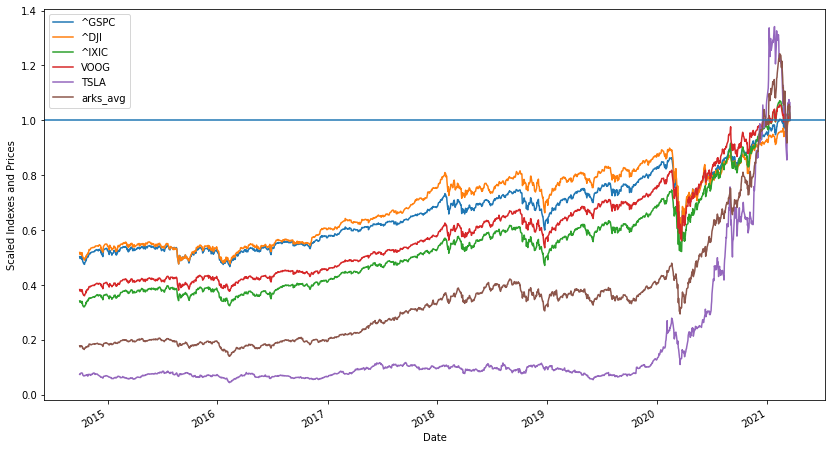

In [11]:
# Plot the scaled indexes and the mean of ETFs

cols = references + ['arks_avg']

df_scaled[cols].plot(figsize=(14,8))
plt.axhline(y=1.0)
plt.ylabel("Scaled Indexes and Prices")
plt.show()

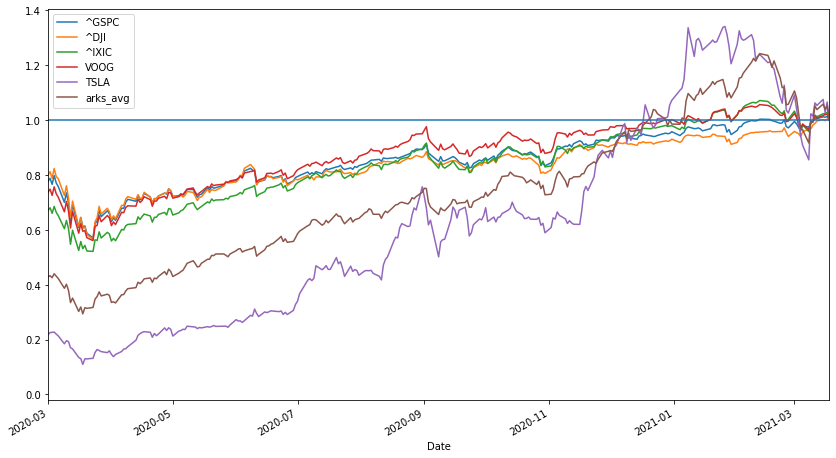

In [12]:
# Plot the scaled indexes and the mean of ETFs since March 2020

df_scaled[cols].plot(figsize=(14,8))
plt.axhline(y=1.0)
plt.xlim("2020-03-01", end_date)
plt.show()

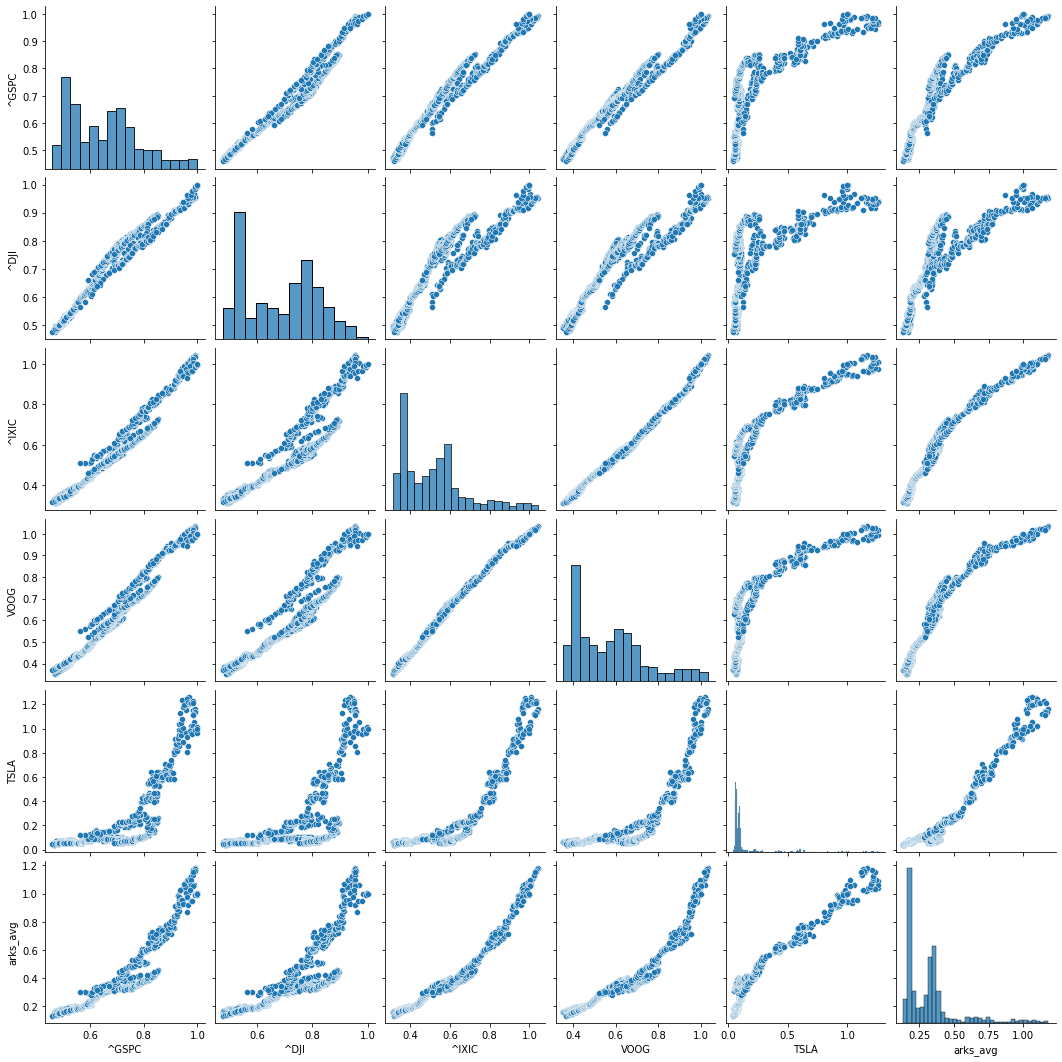

In [101]:
# Plot pairwise relationships in the dataset

sns.pairplot(df_scaled[cols], dropna=True)
plt.show()

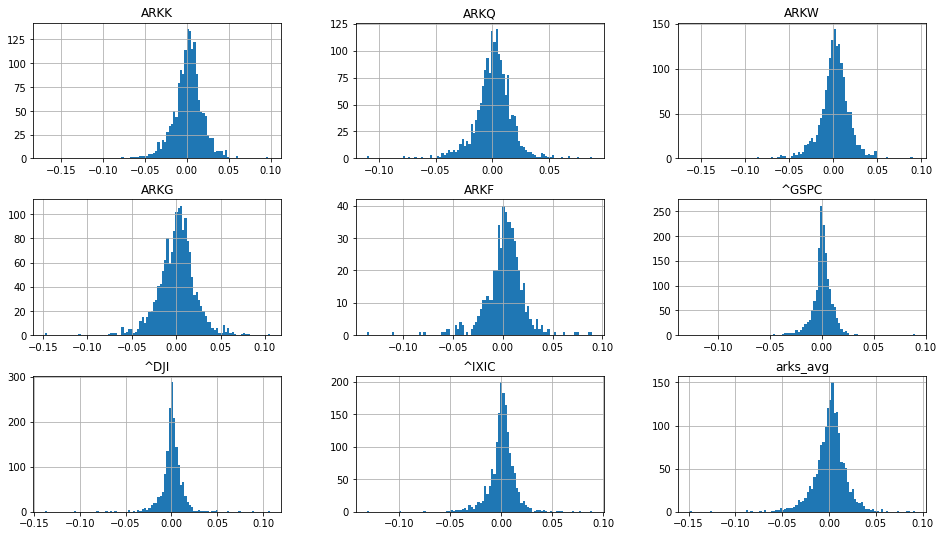

In [60]:
# Compute the daily returns of the ETFs

returns_d = np.log(df/df.shift(1))
returns_d.hist(figsize=(16,9), bins=100)
plt.show()

## Benchmark Indexes

#### Benchmark Indexes
<table>
    <tr>
        <th>Index</th>
        <th>Origin</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>Dow Jones Industrial Average (DJIA)</td>
        <td>U.S.</td>
        <td><b>Price-weighted average</b> of 30 publicly traded U.S. "blue chip" stocks</td>
    </tr>
     <tr>
        <td>NASDAQ Composite</td>
        <td>U.S.</td>
         <td><b>Market capitalization-weighted index</b> of approximately 3,000 common equilities listed on the NASDAQ stock exchange</td>
    </tr>
    <tr>
        <td>S&P 500</td>
        <td>U.S.</td>
        <td><b>Market capitalization-weighted index</b> that tracks the performance of 500 U.S. large-cap stocks</td>
    </tr>
    <tr>
        <td>FTSE 100</td>
        <td>UK</td>
        <td><b>Market-capitalization-weighted index</b> of the 100 largest UK companies traded on the London Stock Exchange</td>
    </tr>
    <tr>
        <td>MSCI World Index</td>
        <td>Global Equilites</td>
        <td><b>Free float-adjusted market capitalization index</b>, consisting of 23 developed market country indexes</td>
    </tr>
</table>


**Market capitalization**: the total amount of money company is valued in the stock market. It is calculated by the number of shares a company has times the price the stocks are selling at. 

- [Benchmarks](https://www.pimco.com/en-us/resources/education/understanding-benchmarks/)
- <a href="https://finance.yahoo.com/world-indices/">Major World Indices</a>
- [Market Cap and Why Is it Important](https://www.thebalance.com/market-capitalization-3305826)


**Takeaways**

### Acquire the Historical Data of Major Indexes

In [2]:
%%time
# Create a list of benchmark index symbols
symbols = ['^GSPC', '^DJI', '^IXIC', '^RUT']

# Define the start and end date
start_date = "2000-01-01"
end_date = date.today()

# Acquire their adjusted closing price
df_marks = acquire.acquire_stock_data(symbols, 'yahoo', start_date, end_date)

# Print the number of records
print(df_marks.shape[0])

# Create a list of benchmark index names
benchmarks = ['S&P500', 'Dow 30', 'Nasdaq Composite', 'Russell 2000']

# Rename the columns as bechmark index names
df_marks.columns = benchmarks

# Inspect the tail of the dataframe
df_marks.tail()

5337
CPU times: user 446 ms, sys: 60 ms, total: 506 ms
Wall time: 2.99 s


,S&P500,Dow 30,Nasdaq Composite,Russell 2000
Date,,,,
2021-03-15,3968.939941,32953.460938,13459.709961,2360.169922
2021-03-16,3962.709961,32825.949219,13471.570312,2319.520020
2021-03-17,3974.120117,33015.371094,13525.200195,2336.389893
2021-03-18,3915.459961,32862.300781,13116.169922,2267.590088
2021-03-19,3913.100098,32627.970703,13215.235352,2287.545166


In [3]:
# Inspect the head of the dataframe
df_marks.head()

,S&P500,Dow 30,Nasdaq Composite,Russell 2000
Date,,,,
2000-01-03,1455.219971,11357.509766,4131.149902,496.420013
2000-01-04,1399.420044,10997.929688,3901.689941,478.380005
2000-01-05,1402.109985,11122.650391,3877.540039,478.829987
2000-01-06,1403.449951,11253.259766,3727.129883,475.339996
2000-01-07,1441.469971,11522.559570,3882.620117,488.309998


In [4]:
# Print the concise summary
df_marks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5337 entries, 2000-01-03 to 2021-03-19
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S&P500            5337 non-null   float64
 1   Dow 30            5337 non-null   float64
 2   Nasdaq Composite  5337 non-null   float64
 3   Russell 2000      5337 non-null   float64
dtypes: float64(4)
memory usage: 208.5 KB


### Data Preparation

In [5]:
# Compute the percentage of the null values
df_marks.isnull().sum(axis=0)

S&P500              0
Dow 30              0
Nasdaq Composite    0
Russell 2000        0
dtype: int64

**Takeaways**: 
1. 3-8% of the values are missing each columns ('S&P500','Dow 30','Nasdaq Composite','Russell 2000','Hang Seng', 'Shenghai'). 
2. S&P 500, Dow 30, Nasdaq Composite, and Russell 2000 have exactly the same ratio of missing values, which may suggests that they may happen at the time.
3. After I removed the Hang Seng Index and Shanghai, null values don't exist any more. 

### Data Exploration

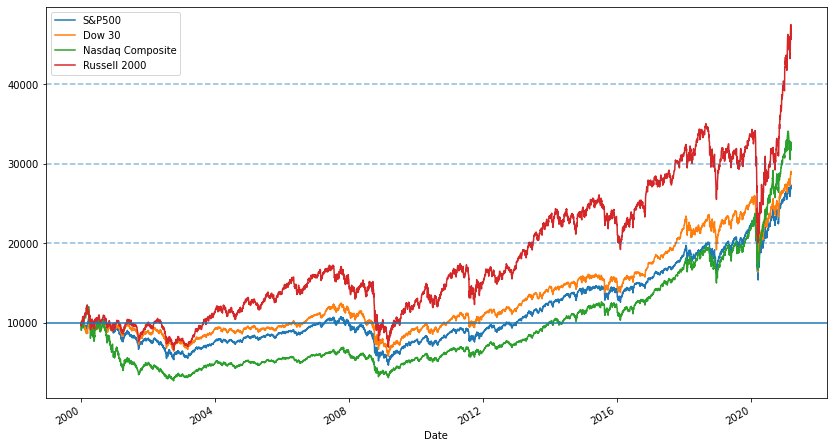

In [7]:
# Plot the return if I invest 10,000 in 2000 for each of the index

df_marks.apply(lambda i: i*10000/i.iloc[0], axis=0).plot(figsize=(14,8))
plt.axhline(y=10000)
plt.axhline(y=20000, linestyle='--', alpha=0.5)
plt.axhline(y=30000, linestyle='--', alpha=0.5)
plt.axhline(y=40000, linestyle='--', alpha=0.5)
plt.show()

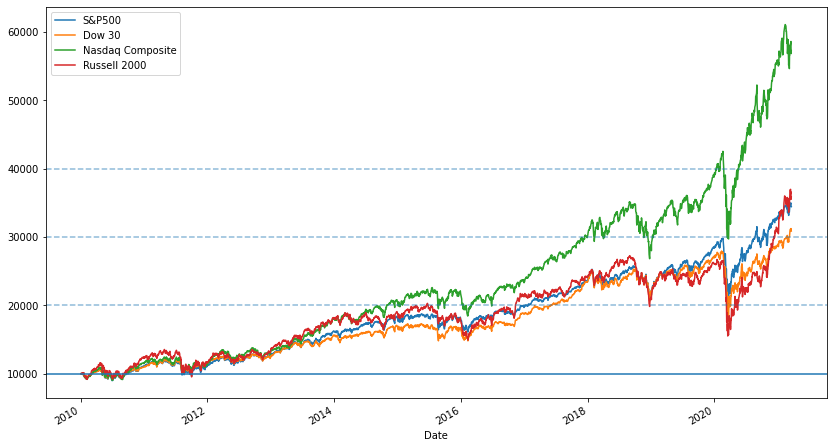

In [17]:
# Plot the return if I invest 10,000 in 2015 for each of the index

df_marks.loc["2010":].apply(lambda i: i*10000/i.iloc[1], axis=0).plot(figsize=(14,8))
plt.axhline(y=10000)
plt.axhline(y=20000, linestyle='--', alpha=0.5)
plt.axhline(y=30000, linestyle='--', alpha=0.5)
plt.axhline(y=40000, linestyle='--', alpha=0.5)
plt.show()

**Takeaways**
1. The returns on the indexes depends on the where you start to invest.

In [18]:
# Add new columns for year, month, day, and day_name

df_marks = df_marks.assign(year = df_marks.index.year, 
                           month = df_marks.index.month,
                           day = df_marks.index.day,
                           day_name = df_marks.index.day_name())

# Sanity check
df_marks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5337 entries, 2000-01-03 to 2021-03-19
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S&P500            5337 non-null   float64
 1   Dow 30            5337 non-null   float64
 2   Nasdaq Composite  5337 non-null   float64
 3   Russell 2000      5337 non-null   float64
 4   year              5337 non-null   int64  
 5   month             5337 non-null   int64  
 6   day               5337 non-null   int64  
 7   day_name          5337 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 504.3+ KB


In [19]:
# Group the observation by year
grouped_year = df_marks.groupby('year')

# Print the data type
type(grouped_year)

pandas.core.groupby.generic.DataFrameGroupBy

In [20]:
# Print all the group names
grouped_year.groups.keys()

dict_keys([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [21]:
# Print all the group names
grouped_year.indices.keys()

dict_keys([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

**Takeaways**
1. Pandas GroupBy objects have been created.
2. The name of each group is its year.
3. There are two ways to acess the group names. 

In [22]:
# Construct dataframe from group with provided name
# Take year 2000 for example

df_marks2000 = grouped_year.get_group(2000)
df_marks2000

,S&P500,Dow 30,Nasdaq Composite,Russell 2000,year,month,day,day_name
Date,,,,,,,,
2000-01-03,1455.219971,11357.509766,4131.149902,496.420013,2000,1,3,Monday
2000-01-04,1399.420044,10997.929688,3901.689941,478.380005,2000,1,4,Tuesday
2000-01-05,1402.109985,11122.650391,3877.540039,478.829987,2000,1,5,Wednesday
2000-01-06,1403.449951,11253.259766,3727.129883,475.339996,2000,1,6,Thursday
2000-01-07,1441.469971,11522.559570,3882.620117,488.309998,2000,1,7,Friday
...,...,...,...,...,...,...,...,...
2000-12-22,1305.949951,10635.559570,2517.020020,462.989990,2000,12,22,Friday
2000-12-26,1315.189941,10692.440430,2493.520020,466.630005,2000,12,26,Tuesday
2000-12-27,1328.920044,10803.160156,2539.350098,479.299988,2000,12,27,Wednesday


In [33]:
# Compute the relative prices using the first day of year as the base for year 2000
df_marks2000[benchmarks].apply(lambda i: i*10000/i.iloc[1], axis=0)

,S&P500,Dow 30,Nasdaq Composite,Russell 2000
Date,,,,
2000-01-03,10398.736084,10326.952516,10588.104038,10377.106241
2000-01-04,10000.000000,10000.000000,10000.000000,10000.000000
2000-01-05,10019.221830,10113.403801,9938.103994,10009.406365
2000-01-06,10028.796981,10232.161948,9552.603971,9936.452015
2000-01-07,10300.481095,10477.026038,9951.124194,10207.575412
...,...,...,...,...
2000-12-22,9332.079791,9670.510607,6451.102105,9678.288923
2000-12-26,9398.107074,9722.230214,6390.871794,9754.379366
2000-12-27,9496.219878,9822.903458,6508.333916,10019.231216


In [32]:
# Compute the relative prices for each year

# Create a empty dataframe
df_marks_relative = pd.DataFrame()

# Create a list of years
years = list(grouped_year.groups.keys())

# For Loop through the years and compute the relative prices

for year in years:
    df_marks_year = grouped_year.get_group(year)
    df_marks_year = df_marks_year[benchmarks].apply(lambda i: i*10000/i.head(1).values, axis=0)
    df_marks_relative = pd.concat([df_marks_relative, df_marks_year])
    
# Sanity check
df_marks_relative

,S&P500,Dow 30,Nasdaq Composite,Russell 2000
Date,,,,
2000-01-03,10000.000000,10000.000000,10000.000000,10000.000000
2000-01-04,9616.553319,9683.398839,9444.561523,9636.597880
2000-01-05,9635.038094,9793.212262,9386.103460,9645.662415
2000-01-06,9644.246089,9908.210513,9022.015591,9575.359242
2000-01-07,9905.512567,10145.322177,9398.400467,9836.629958
...,...,...,...,...
2021-03-15,10724.980871,10903.116791,10599.490295,12128.874822
2021-03-16,10708.146043,10860.927743,10608.830294,11919.975635
2021-03-17,10738.978888,10923.600639,10651.063702,12006.669638


In [34]:
# Add new columns for year, month, day, and day_name

df_marks_relative = df_marks_relative.assign(year = df_marks_relative.index.year, 
                                             month = df_marks_relative.index.month,
                                             day = df_marks_relative.index.day,
                                             day_name = df_marks_relative.index.day_name())

# Sanity check
df_marks_relative.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5337 entries, 2000-01-03 to 2021-03-19
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S&P500            5337 non-null   float64
 1   Dow 30            5337 non-null   float64
 2   Nasdaq Composite  5337 non-null   float64
 3   Russell 2000      5337 non-null   float64
 4   year              5337 non-null   int64  
 5   month             5337 non-null   int64  
 6   day               5337 non-null   int64  
 7   day_name          5337 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 375.3+ KB


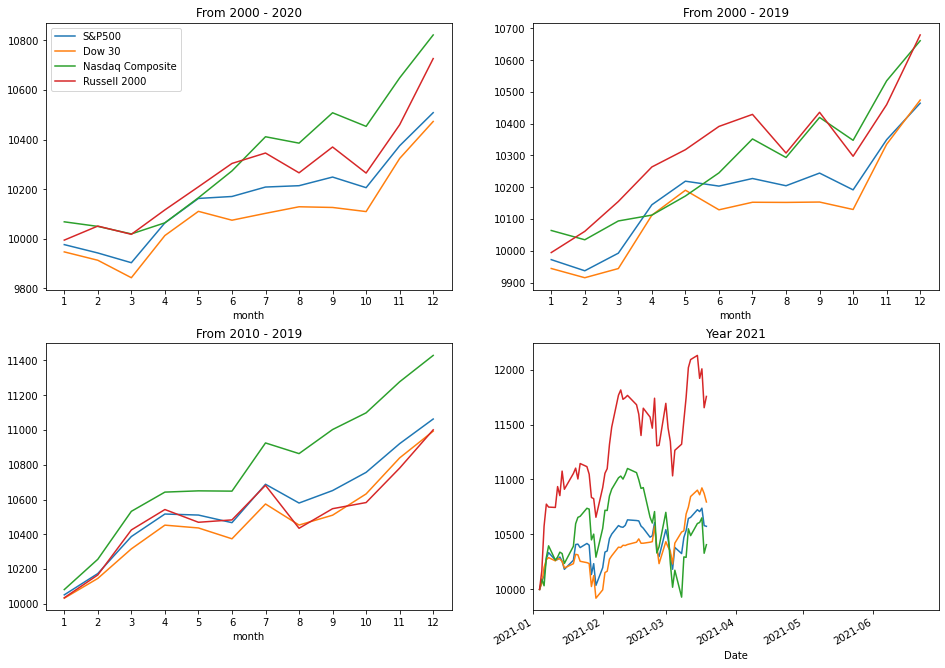

In [52]:
# Create the figures grids
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Flatten the figures grids
ax = ax.ravel()

# Adjust the benchmarks
benchmarks = ['S&P500', 'Dow 30', 'Nasdaq Composite', 'Russell 2000']

for benchmark in benchmarks:
    df_marks_relative.loc["2000": "2020"].groupby('month')[benchmark].mean().plot(ax=ax[0], legend=True)
    
for benchmark in benchmarks:
    df_marks_relative.loc["2000": "2019"].groupby('month')[benchmark].mean().plot(ax=ax[1], legend=False)
    
for benchmark in benchmarks:
    df_marks_relative.loc["2010": "2019"].groupby('month')[benchmark].mean().plot(ax=ax[2], legend=False)
    
for benchmark in benchmarks:    
    df_marks_relative.loc["2021"][benchmark].plot(ax=ax[3], xlim=['2021-01-01', '2021-06-30'], legend=False)

ax[0].set_title("From 2000 - 2020")
ax[1].set_title("From 2000 - 2019")
ax[2].set_title("From 2010 - 2019")
ax[3].set_title("Year 2021")

ax[0].set_xticks([i for i in range(1,13)])
ax[1].set_xticks([i for i in range(1,13)])
ax[2].set_xticks([i for i in range(1,13)])
    
plt.show()